# Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

Импортируем датасет.

In [ ]:
url = 'https://cdn.openedu.ru/ESZCBLZ/courseware/v1/0187032bcfa54f8c26976dad7df1eec9/asset-v1:ITMOUniversity+ADVML+spring_2021_ITMO+type@asset+block/7_25.csv'

In [ ]:
X = pd.read_csv(url, header = None, dtype = 'float64')

Уменьшим размерность при помощи библиотеки __sklearn__. Отдельно обращаем ваше внимание на параметр __svd_solver__, он отвечает за метод оптимизации. Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели, указанные в задании.

In [ ]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([-32.31442582,  -4.26100973])

1) Введите координату первого объекта относительно первой главной компоненты. **(-32.314)**


---


2) Введите координату первого объекта относительно второй главной компоненты. **(-4.261)**


---



Изобразим первые 100 объектов в виде точек на плоскости. В силу того, что нам известны отклики, отметим одинаковые цифры одинаковым цветом.

Если представить, что отклики нам неизвестны, то картина становится гораздо менее радужной. Объединение объектов в группы интуитивно, конечно, возможно, но с существенными оговорками.

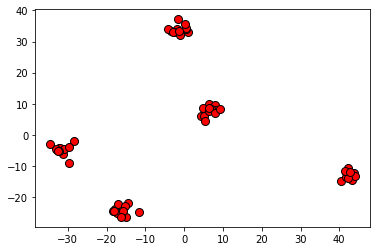

In [ ]:
plt.plot(X_transformed[:101, 0], X_transformed[:101, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

5) Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты? **(5)**


---



Для дальнейшего анализа нам удобно будет построить не 2, а все 64 ГК (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

In [ ]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(X).transform(X)

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.421, 0.69 , 0.931, 0.992, 0.994, 0.996, 0.997, 0.998, 0.999,
       1.   ])

3) Введите долю объясненной дисперсии при использовании первых двух главных компонент. **(0.69)**


---


4) Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85 **(3)**
